In [1]:
# Import all the necessary libraries 

In [2]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [3]:
# Create a dataframe (df) from the .csv file

In [4]:
df = pd.read_csv('C:/Users/kylec/OneDrive/Documents/projects/ufo_sighting_data.csv')

C:\Users\kylec\AppData\Local\Temp\ipykernel_5568\848167342.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/kylec/OneDrive/Documents/projects/ufo_sighting_data.csv')


In [5]:
# View the dataframe

In [6]:
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [7]:
# Drop unnecessary columns

In [8]:
df = df.drop(['Date_time', 'length_of_encounter_seconds', 'described_duration_of_encounter', 'description', 'date_documented'], axis=1)

In [9]:
# View updated dataframe

In [10]:
df.head(60)

,city,state/province,country,UFO_shape,latitude,longitude
0,san marcos,tx,us,cylinder,29.8830556,-97.941111
1,lackland afb,tx,NaN,light,29.38421,-98.581082
2,chester (uk/england),NaN,gb,circle,53.2,-2.916667
3,edna,tx,us,circle,28.9783333,-96.645833
4,kaneohe,hi,us,light,21.4180556,-157.803611
5,bristol,tn,us,sphere,36.595,-82.188889
6,penarth (uk/wales),NaN,gb,circle,51.434722,-3.180000
7,norwalk,ct,us,disk,41.1175,-73.408333
8,pell city,al,us,disk,33.5861111,-86.286111
9,live oak,fl,us,disk,30.2947222,-82.984167


In [11]:
# Remove non-numeric values in latitude and longitude columns

In [12]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [13]:
# Create geometry column

In [14]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

In [15]:
# Plot the map

<AxesSubplot:>

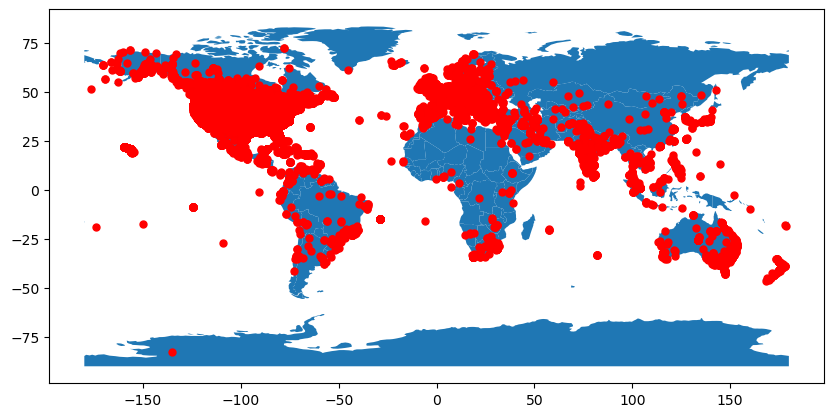

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=25)